<h1 align="center"> Лабораторная работа №2 </h1>

---

<h1 align="center"> Университет ИТМО </h1>
<h2 align="center"> Факультет систем управления и робототехники </h2>

---

### Выполнили:
- **Соколов Никита**  
- **Минеев Кирилл**
- **Соловьев Дмитрий**
- **Семёнов Евгений**

---

### Проверил:
- **Догадин Егор Витальевич**

---

### 23 сентября 2024 г.

---

# Подготовка.

### Установка необходимых библиотек:

In [115]:
!pip install numpy matplotlib sympy


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import random
import math;

### Придумаем четыре целых числа a, b, c, d таким образом, чтобы все они были различными и ни одно из них не равнялось 0 или ±1.

In [117]:
a = random.randint(1, 6)
b = random.randint(a + 1, 11)
c = random.randint(b + 1, 16)
d = random.randint(c + 1, 21)

print(a, b, c, d, sep = "\t")

2	3	7	18


### Исходные значения x и y:

In [118]:
x_min, x_max = -5, 5
y_min, y_max = -4, 4

x_old = np.linspace(x_min, x_max, 11)
y_old = np.linspace(y_min, y_max, 9)
xy_old = np.column_stack([[x, y] for x in x_old for y in y_old])

### Функция для визуализации линейных отображений: 

In [119]:
colors = list(map(lambda x, y: (min(1, 1-y/4), min(1, 1+y/4), 1/5 + x/25), xy_old[0], xy_old[1]))

def plot_grid(xy_grid):
    plt.figure(figsize=(6, 6), facecolor="w")
    plt.scatter(xy_grid[0], xy_grid[1], s = 50, c = colors)
    plt.axis('equal')
    plt.grid(True)
    

### Функция для построения прямых:

In [120]:
def plot_line(k):
    x = np.linspace(x_min, x_max, 11)
    y = k * x
    plt.plot(x, y, color="red")
    plt.ylim(y_min, y_max)
    plt.show()

### Исходная сетка значений:

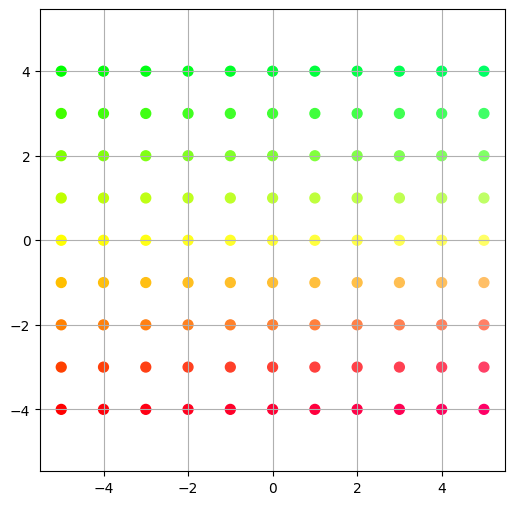

In [121]:
plot_grid(xy_old)

# Задание 1.

<h3 style="font-weight: bold;">1. Отражение (симметрия) плоскости относительно прямой y = ax: </h3>

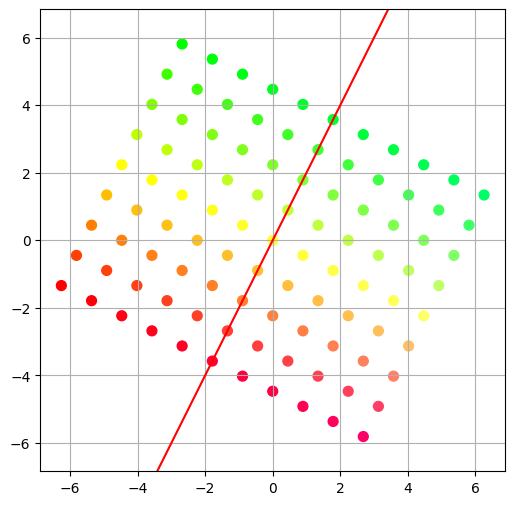

⎡0.894427190999916   0.447213595499958⎤
⎢                                     ⎥
⎣-0.447213595499958  0.894427190999916⎦


In [122]:
theta_angle = -(math.pi / 2 - np.arctan(a))

first_matrix = Matrix([
    [np.cos(theta_angle), -np.sin(theta_angle)],
    [np.sin(theta_angle), np.cos(theta_angle)]
])

xy_new = np.dot(first_matrix, xy_old)
plot_grid(xy_new)

plot_line(a)
pprint(first_matrix)

<h3 style="font-weight: bold;">2. Отображение всей плоскости в прямую y = bx: </h3>

⎡1  1⎤
⎢    ⎥
⎣3  3⎦


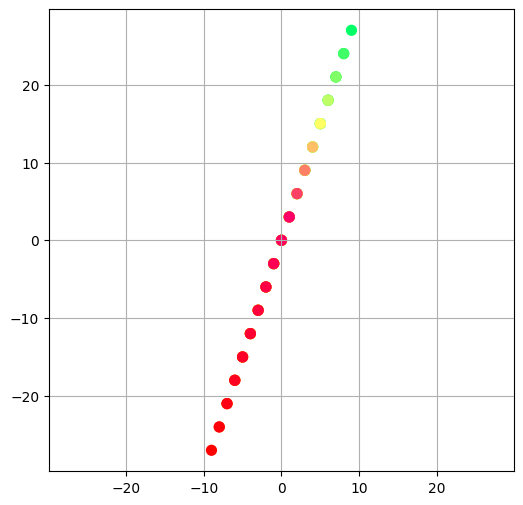

In [123]:
second_matrix = Matrix([
    [1, 1], 
    [b, b]
])

xy_new = np.dot(second_matrix, xy_old)

plot_grid(xy_new)
pprint(second_matrix)

<h3 style="font-weight: bold;">3. Поворот плоскости на 10c градусов против часовой стрелки: </h3>

⎡0.342020143325669  -0.939692620785908⎤
⎢                                     ⎥
⎣0.939692620785908  0.342020143325669 ⎦


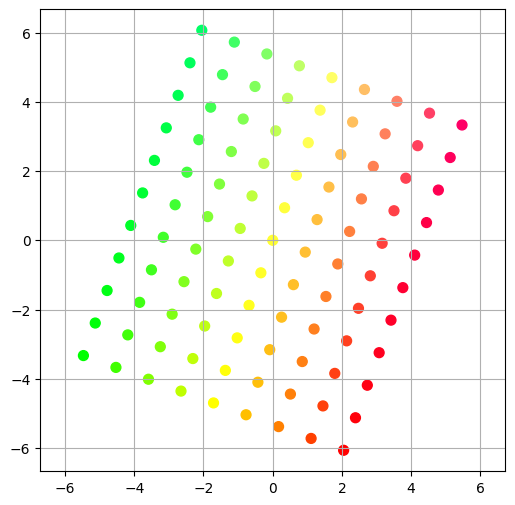

In [124]:
alpha_angle = np.radians(10 * c)

third_matrix = Matrix([
    [np.cos(alpha_angle), -np.sin(alpha_angle)],
    [np.sin(alpha_angle), np.cos(alpha_angle)]
])

xy_new = np.dot(third_matrix, xy_old)

plot_grid(xy_new)
pprint(third_matrix)

<h3 style="font-weight: bold;">4. Центральная симметрия плоскости относительно начала координат: </h3>

⎡-1.0   0  ⎤
⎢          ⎥
⎣ 0    -1.0⎦


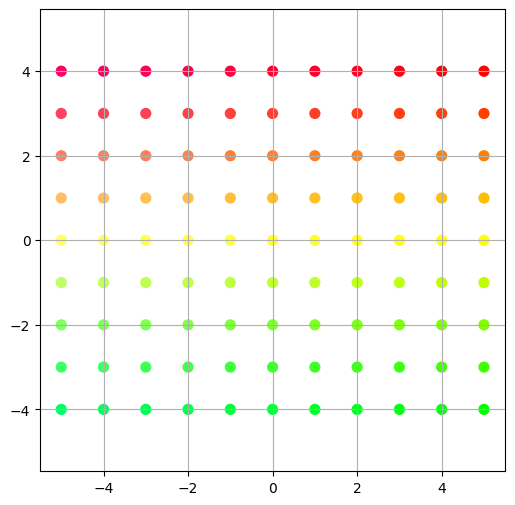

In [125]:
beta_angle = math.pi

fourth_matrix = Matrix([
    [np.cos(beta_angle), round(-np.sin(beta_angle))],
    [round(np.sin(beta_angle)), np.cos(beta_angle)]
])

xy_new = np.dot(fourth_matrix, xy_old)

plot_grid(xy_new)
pprint(fourth_matrix)

<h3 style="font-weight: bold;">5. Отображение, которое можно описать так: сначала отражение относительно прямой y = ax, потом поворот на 10d градусов по часовой стрелке: </h3>

⎡-0.894427190999916  -0.447213595499958⎤
⎢                                      ⎥
⎣0.447213595499958   -0.894427190999916⎦


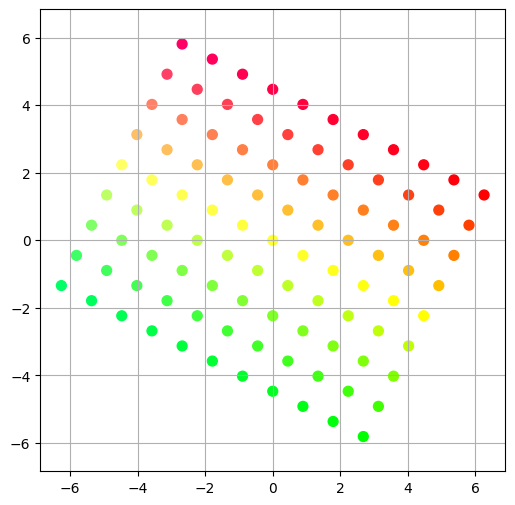

In [126]:
gamma_angle = np.radians(10 * d)

fifth_matrix = Matrix([
    [np.cos(gamma_angle), -np.sin(gamma_angle)],
    [np.sin(gamma_angle), np.cos(gamma_angle)]
]) * first_matrix

xy_new = np.dot(fifth_matrix, xy_old)

plot_grid(xy_new)
pprint(fifth_matrix)

<h3 style="font-weight: bold;">6. Отображение, которое переводит прямую y = 0 в y = ax и прямую x = 0 в y = bx: </h3>

⎡1  0.666666666666667⎤
⎢                    ⎥
⎣2          2        ⎦


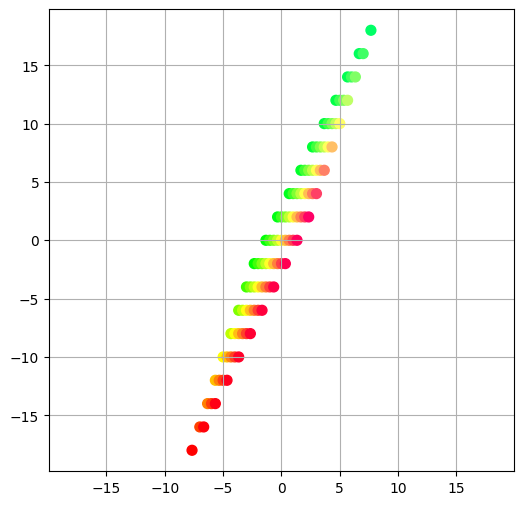

In [127]:
sixth_matrix = Matrix([
    [1, a / b],
    [a, a]
])

xy_new = np.dot(sixth_matrix, xy_old)

plot_grid(xy_new)
pprint(sixth_matrix)

<h3 style="font-weight: bold;">7. Отображение, которое переводит прямую y = ax в y = 0 и прямую y = bx в x = 0: </h3>

⎡3.0   -1.0⎤
⎢          ⎥
⎣-3.0  1.5 ⎦


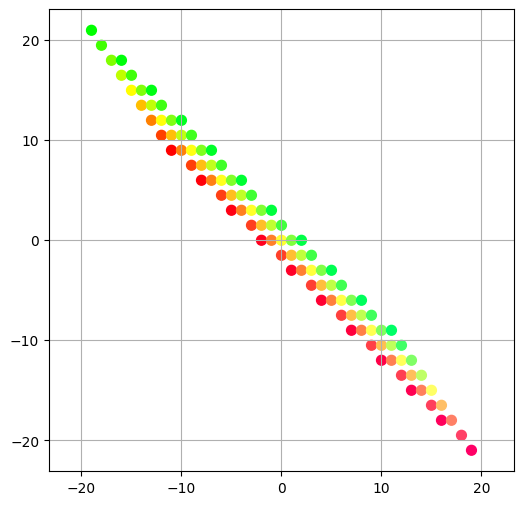

In [128]:
seventh_matrix = sixth_matrix.inv()

xy_new = np.dot(seventh_matrix, xy_old)

plot_grid(xy_new)
pprint(seventh_matrix)

<h3 style="font-weight: bold;">8. Отображение, которое меняет местами прямые y = ax и y = bx: </h3>

<h3 style="font-weight: bold;">9. Отображение, которое переводит круг единичной площади с центром в начале координат в круг площади c: </h3>

⎡7  0⎤
⎢    ⎥
⎣0  7⎦


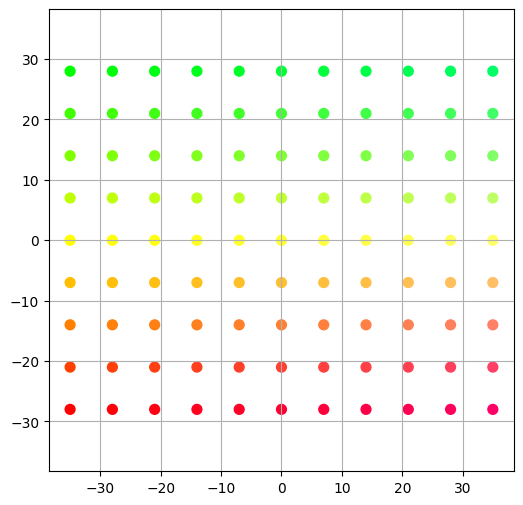

In [129]:
ninth_matrix = Matrix([
    [c, 0],
    [0, c]
])

xy_new = np.dot(ninth_matrix, xy_old)

plot_grid(xy_new)
pprint(ninth_matrix)

<h3 style="font-weight: bold;">10. Отображение, которое переводит круг единичной площади с центром в начале
координат в некруг площади d:</h3>

⎡5.72957795130823  0⎤
⎢                   ⎥
⎣       0          1⎦


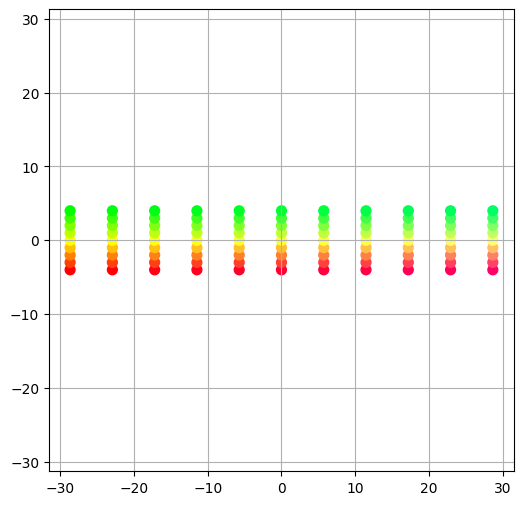

In [130]:
tenth_matrix = Matrix([
    [d / math.pi, 0],
    [0, 1]
])

xy_new = np.dot(tenth_matrix, xy_old)

plot_grid(xy_new)
pprint(tenth_matrix)